# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

Tamaño original: 2940000 bytes
k = 1: 14000 bytes
k = 2: 28000 bytes
k = 10: 140000 bytes
k = 30: 420000 bytes
k = 100: 1400000 bytes


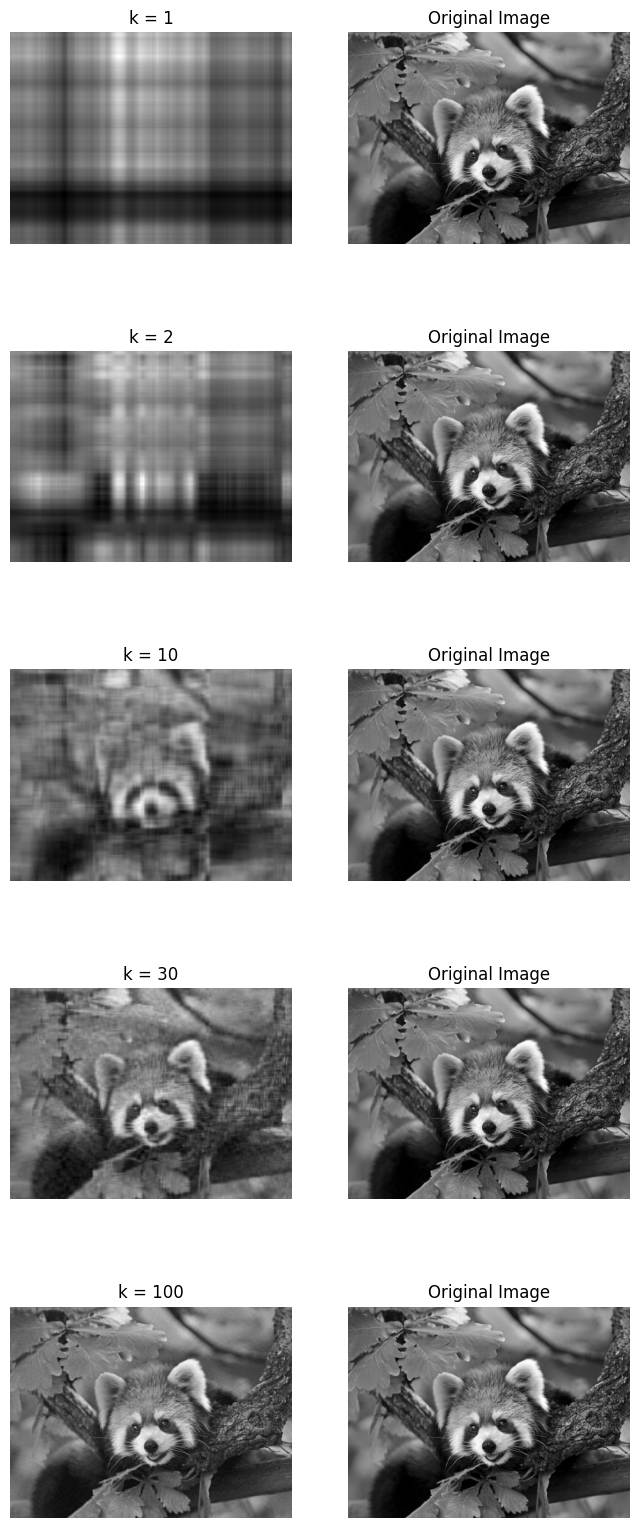

In [1]:
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
 
img = Image.open('panda.jpg') # Загрузка изображения из файла 'panda.jpg'
w, h = img.size # Получение ширины и высоты изображения
gray_img = rgb2gray(img) # Преобразование цветного изображения в градации серого
 
# Выполнение сингулярного разложения (SVD) матрицы изображения
# U - левые сингулярные векторы, S - сингулярные значения, V_T - транспонированные правые сингулярные векторы
U, S, V_T = np.linalg.svd(gray_img, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))
 
 # Calcular tamaño original
original_size = gray_img.nbytes
print(f"Tamaño original: {original_size} bytes")

curr_fig = 0
for r in [1, 2, 10, 30, 100]:
    '''
    U[:, :r] - берем первые r столбцов из U (самые важные компоненты)
    S[0:r, :r] - берем квадратную подматрицу размером r×r из S (самые большие сингулярные значения)
    V_T[:r, :] - берем первые r строк из Vᵀ (соответствующие правые векторы)
    @ - матричное умножение
    '''
    
    img_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]

    # Calcular tamaño comprimido
    compressed_size = U[:, :r].nbytes + S[:r].nbytes + V_T[:r, :].nbytes
    print(f"k = {r}: {compressed_size} bytes")

    # Отображение аппроксимированного изображения на левом подграфике
    ax[curr_fig][0].imshow(img_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = " + str(r))
    ax[curr_fig, 0].axis('off')
    # Отображение исходного изображения на правом подграфике
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_img, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()


